#  Atividades previstas para este Notebook:
> 1. Carregar a tabela olist_ibge_v13  

> 2. Ajustá-lo para ter um modelo aplicado a si.  
>> Criar variável target.  
>> Aplicar Label Encoder nas variáveis categóricas.  

> 3. Aplicar os modelos de Decision Tree e Logistic Regression.  
> 4. Antes disso, executar UNDER-SAMPLING de 30% na classe 1 (clientes satisfeitos)

##  1 - Importação de bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.options.display.max_columns = 100


## 2 - Importação da tabela <font color=red>'olist_ibge_v13'</font> 

In [2]:
olist_ibge_v13 = pd.read_excel('olist_ibge_v13.xlsx', sheet_name = "Sheet1", header = 0, index_col=None) # sem dtype = 'object'

In [3]:
olist_ibge_v13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 19 columns):
Unnamed: 0               92935 non-null int64
order_id                 92935 non-null object
product_id               92935 non-null object
seller_id                92935 non-null object
product_category_name    92935 non-null object
sigla_state              92935 non-null object
seller_sigla_state       92935 non-null object
review_score             92935 non-null int64
qtde_boleto              92935 non-null int64
qtde_credit_card         92935 non-null int64
qtde_debit_card          92935 non-null int64
qtde_voucher             92935 non-null int64
soma_payment             92935 non-null float64
qtde_installments        92935 non-null int64
AR_MUN_2018              92935 non-null float64
POPULAÇÃO ESTIMADA       92935 non-null int64
PIB                      92935 non-null float64
gini                     92935 non-null float64
dias                     92935 non-null float64
d

### 2.1 - Deletar a coluna  <font color=red>'Unnamed: 0'</font>  
> Ela é um ruído que sempre surge ao importarmos um arquivo para um DataFrame

In [4]:
olist_ibge_v14 = olist_ibge_v13.drop(['Unnamed: 0'], axis=1)

In [5]:
olist_ibge_v14.shape, olist_ibge_v13.shape

((92935, 18), (92935, 19))

In [6]:
olist_ibge_v14.head()

,order_id,product_id,seller_id,product_category_name,sigla_state,seller_sigla_state,review_score,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,POPULAÇÃO ESTIMADA,PIB,gini,dias
0,50ba38c4dc467baab1ea2c8c7747934d,418d480693f2f01e9cf4568db0346d28,12b9676b00f60f3b700e83af21824c0e,cool_stuff,mg,rs,5,0,1,0,0,219.63,10,881.06,7037,"180,088.78",0.65,21.11
1,d99e6849f7676dade195f20c26f0eb4f,1081ae52311daac87fb54ba8ce4670ac,4371b634e0efc0e22b09b52907d9d469,esporte_lazer,mg,sp,5,0,1,0,0,135.59,1,881.06,7037,"180,088.78",0.65,5.84
2,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,c1aabbb6f4caec9f5bf7cd80519d6cc0,579891617139df7d8671d373f0669622,livros_interesse_geral,mg,rj,5,1,0,0,0,58.28,1,881.06,7037,"180,088.78",0.65,8.63
3,3f1294f87d79b57f5d55ba7b80c3d94f,0a9b9a871ffaec6c0198334558a6c6a1,f9244d45189d3a3605499abddeade7d5,eletroportateis,go,sp,4,0,1,0,0,"1,025.52",8,"1,045.13",18427,"287,984.49",0.73,29.10
4,6c12feac9a308e1382d9b19cca7f20b2,d47821b10559fffaefcf3e57d2b5ff76,0df3984f9dfb3d49ac6366acbd3bbb85,beleza_saude,mg,mg,4,0,1,0,0,220.97,4,"1,817.07",23574,"430,235.36",0.66,4.80


### 2.2 - Criar coluna target para  <font color=red>'olist_ibge_v14'</font>  
> A partir de 'review_score'.  
>> Chamada 'humor'

In [7]:
olist_ibge_v14.columns

Index(['order_id', 'product_id', 'seller_id', 'product_category_name',
       'sigla_state', 'seller_sigla_state', 'review_score', 'qtde_boleto',
       'qtde_credit_card', 'qtde_debit_card', 'qtde_voucher', 'soma_payment',
       'qtde_installments', 'AR_MUN_2018', 'POPULAÇÃO ESTIMADA', 'PIB', 'gini',
       'dias'],
      dtype='object')

In [8]:
# Nova coluna chamada 'humor' será 0 (zero), quando review_score for de 1 a 3, ou 1 (um), quando review_score for 4 ou 5.
a = {1:0, 2:0, 3:0 , 4:1, 5:1}
olist_ibge_v14['humor'] = olist_ibge_v14['review_score'].map(a)

In [9]:
olist_ibge_v14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 19 columns):
order_id                 92935 non-null object
product_id               92935 non-null object
seller_id                92935 non-null object
product_category_name    92935 non-null object
sigla_state              92935 non-null object
seller_sigla_state       92935 non-null object
review_score             92935 non-null int64
qtde_boleto              92935 non-null int64
qtde_credit_card         92935 non-null int64
qtde_debit_card          92935 non-null int64
qtde_voucher             92935 non-null int64
soma_payment             92935 non-null float64
qtde_installments        92935 non-null int64
AR_MUN_2018              92935 non-null float64
POPULAÇÃO ESTIMADA       92935 non-null int64
PIB                      92935 non-null float64
gini                     92935 non-null float64
dias                     92935 non-null float64
humor                    92935 non-null int64
d

In [10]:
olist_ibge_v14['humor'].unique()

array([1, 0], dtype=int64)

In [11]:
qtde_humores = olist_ibge_v14.groupby('humor')['order_id'].count()

In [12]:
df_qtde_humores = pd.DataFrame(qtde_humores)

In [13]:
df_qtde_humores

,order_id
humor,
0,19868
1,73067


In [14]:
print(73067+19868)

92935


In [15]:
print(19868*100/92935)

21.378382740625167


In [16]:
print(73067*100/92935)

78.62161725937483


In [17]:
# Seleção de clientes com humor = 1
# satisfeitos = olist_ibge_v14.loc[olist_ibge_v14["humor"] == 1]

In [18]:
# Seleção de clientes com humor = 0
# insatisfeitos = olist_ibge_v14.loc[olist_ibge_v14["humor"] == 0]

In [19]:
# insatisfeitos.info()

In [20]:
# satisfeitos.info()

In [21]:
# seleção aleatória de 40% de satisfeitos.
# satisfeitos_40 = satisfeitos.sample(29227)

In [22]:
# satisfeitos_40.info()

In [23]:
# Põe os dois grupos juntos: os 40% satisfeitos e os insatisfeitos
# dados_emp=pd.concat([dados1,dados2])
# olist_ibge_under_sampled = pd.concat([satisfeitos_40,insatisfeitos])

In [24]:
olist_ibge_v14.head()

,order_id,product_id,seller_id,product_category_name,sigla_state,seller_sigla_state,review_score,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,POPULAÇÃO ESTIMADA,PIB,gini,dias,humor
0,50ba38c4dc467baab1ea2c8c7747934d,418d480693f2f01e9cf4568db0346d28,12b9676b00f60f3b700e83af21824c0e,cool_stuff,mg,rs,5,0,1,0,0,219.63,10,881.06,7037,"180,088.78",0.65,21.11,1
1,d99e6849f7676dade195f20c26f0eb4f,1081ae52311daac87fb54ba8ce4670ac,4371b634e0efc0e22b09b52907d9d469,esporte_lazer,mg,sp,5,0,1,0,0,135.59,1,881.06,7037,"180,088.78",0.65,5.84,1
2,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,c1aabbb6f4caec9f5bf7cd80519d6cc0,579891617139df7d8671d373f0669622,livros_interesse_geral,mg,rj,5,1,0,0,0,58.28,1,881.06,7037,"180,088.78",0.65,8.63,1
3,3f1294f87d79b57f5d55ba7b80c3d94f,0a9b9a871ffaec6c0198334558a6c6a1,f9244d45189d3a3605499abddeade7d5,eletroportateis,go,sp,4,0,1,0,0,"1,025.52",8,"1,045.13",18427,"287,984.49",0.73,29.10,1
4,6c12feac9a308e1382d9b19cca7f20b2,d47821b10559fffaefcf3e57d2b5ff76,0df3984f9dfb3d49ac6366acbd3bbb85,beleza_saude,mg,mg,4,0,1,0,0,220.97,4,"1,817.07",23574,"430,235.36",0.66,4.80,1


In [25]:
crosstab = pd.crosstab(olist_ibge_v14['dias'], olist_ibge_v14['humor'], margins = True)

In [26]:
crosstab.head()

humor,0,1,All
dias,,,
0.53,0,1,1
0.78,1,0,1
0.86,1,0,1
0.86,1,0,1
0.89,0,1,1


In [27]:
olist_ibge_v14.describe()

,review_score,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,POPULAÇÃO ESTIMADA,PIB,gini,dias,humor
count,"92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00"
mean,4.15,0.20,0.77,0.02,0.06,160.50,2.93,"1,279.54","2,826,551.15","151,772,033.94",0.79,12.56,0.79
std,1.29,0.40,0.43,0.12,0.41,219.69,2.72,"3,553.72","4,325,960.32","247,687,238.20",0.11,9.51,0.41
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3.56,838.00,"14,959.96",0.35,0.53,0.00
25%,4.00,0.00,1.00,0.00,0.00,62.01,1.00,318.68,"102,268.00","2,921,663.24",0.74,6.79,1.00
50%,5.00,0.00,1.00,0.00,0.00,105.28,2.00,693.83,"477,798.00","18,469,475.89",0.80,10.22,1.00
75%,5.00,0.00,1.00,0.00,0.00,177.28,4.00,"1,521.11","2,938,092.00","88,277,462.53",0.87,15.71,1.00
max,5.00,1.00,2.00,2.00,25.00,"13,664.08",24.00,"159,533.33","12,038,175.00","687,035,889.61",0.99,209.63,1.00


In [28]:
# Deletar 'qtde_boleto', por correlação de -0.9 com 'qtde_credit_card', e 'POPULAÇAO ESTIMADA', por ter correlação de 1 com 'PIB'
# Deletar 'order_id' por ser somente chave primária e 'review_score', pois já temos oriunda dela a coluna 'humor', nosso alvo.
olist_ibge_v15 = olist_ibge_v14.drop(['qtde_boleto', 'POPULAÇÃO ESTIMADA', 'order_id', 'review_score'], axis=1)

In [29]:
olist_ibge_v15.shape, olist_ibge_v14.shape

((92935, 15), (92935, 19))

In [30]:
olist_ibge_v15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 15 columns):
product_id               92935 non-null object
seller_id                92935 non-null object
product_category_name    92935 non-null object
sigla_state              92935 non-null object
seller_sigla_state       92935 non-null object
qtde_credit_card         92935 non-null int64
qtde_debit_card          92935 non-null int64
qtde_voucher             92935 non-null int64
soma_payment             92935 non-null float64
qtde_installments        92935 non-null int64
AR_MUN_2018              92935 non-null float64
PIB                      92935 non-null float64
gini                     92935 non-null float64
dias                     92935 non-null float64
humor                    92935 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 10.6+ MB


In [31]:
olist_ibge_v15.head()

,product_id,seller_id,product_category_name,sigla_state,seller_sigla_state,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,PIB,gini,dias,humor
0,418d480693f2f01e9cf4568db0346d28,12b9676b00f60f3b700e83af21824c0e,cool_stuff,mg,rs,1,0,0,219.63,10,881.06,"180,088.78",0.65,21.11,1
1,1081ae52311daac87fb54ba8ce4670ac,4371b634e0efc0e22b09b52907d9d469,esporte_lazer,mg,sp,1,0,0,135.59,1,881.06,"180,088.78",0.65,5.84,1
2,c1aabbb6f4caec9f5bf7cd80519d6cc0,579891617139df7d8671d373f0669622,livros_interesse_geral,mg,rj,0,0,0,58.28,1,881.06,"180,088.78",0.65,8.63,1
3,0a9b9a871ffaec6c0198334558a6c6a1,f9244d45189d3a3605499abddeade7d5,eletroportateis,go,sp,1,0,0,"1,025.52",8,"1,045.13","287,984.49",0.73,29.10,1
4,d47821b10559fffaefcf3e57d2b5ff76,0df3984f9dfb3d49ac6366acbd3bbb85,beleza_saude,mg,mg,1,0,0,220.97,4,"1,817.07","430,235.36",0.66,4.80,1


### Importação da biblioteca LabelEncoder

In [32]:
from sklearn.preprocessing import LabelEncoder

### Chamando o objeto

In [33]:
le = LabelEncoder()

### Verificando o objeto le

In [34]:
le

LabelEncoder()

### Aplicação do objeto aos dados categóricos de '<font color=red>olist_ibge_v14</font>'

In [35]:
le_product_id = le.fit_transform(olist_ibge_v14['product_id'])

In [36]:
le_seller_id = le.fit_transform(olist_ibge_v14['seller_id'])

In [37]:
le_product_category_name = le.fit_transform(olist_ibge_v14['product_category_name'])

In [38]:
le_sigla_state = le.fit_transform(olist_ibge_v14['sigla_state'])

In [39]:
le_seller_sigla_state = le.fit_transform(olist_ibge_v14['seller_sigla_state'])

### Exibição do array le_sigla_state
> le_sigla_state é um array.<br>
>Portanto, será necessário transformá-lo em dataframe.  
>> Aliás, vamos transformar em array os 05 (cinco) conjuntos gerados acima cujos nomes são 'le_qualquer_coisa'

In [40]:
le_sigla_state

array([10, 10, 10, ...,  9,  9, 23])

In [41]:
df_le_product_id = pd.DataFrame(le_product_id,columns = ['le_product_id'])

In [42]:
df_le_seller_id = pd.DataFrame(le_seller_id,columns = ['le_seller_id'])

In [43]:
df_le_product_category_name = pd.DataFrame(le_product_category_name,columns = ['le_product_category_name'])

In [44]:
df_le_sigla_state = pd.DataFrame(le_sigla_state,columns = ['le_sigla_state'])

In [45]:
df_le_seller_sigla_state = pd.DataFrame(le_seller_sigla_state,columns = ['le_seller_sigla_state'])

###  Exibição das linhas iniciais dos DataFrame do LabelEncoder.

In [46]:
df_le_product_id.head()

,le_product_id
0,7841
1,1976
2,22780
3,1247
4,25080


In [47]:
df_le_seller_id.head()

,le_seller_id
0,207
1,769
2,1011
3,2810
4,160


In [48]:
df_le_product_category_name.head()

,le_product_category_name
0,26
1,32
2,48
3,31
4,11


In [49]:
df_le_sigla_state.head()

,le_sigla_state
0,10
1,10
2,10
3,8
4,10


In [50]:
df_le_seller_sigla_state.head()

,le_seller_sigla_state
0,18
1,21
2,15
3,21
4,7


### Junção dos dataframes 'le_qualquer_coisa' com 'olist_ibge_vxx'

In [51]:
olist_ibge_v16 = pd.merge(olist_ibge_v15, # tabela da esquerda a ser juntada
                         df_le_product_id,  # tabela da direita a ser juntada
                         left_index=True, #If True, use the index (row labels) from the left DataFrame or Series as its join key(s)
                         right_index=True) #Same usage as left_index for the right DataFrame or Series

In [52]:
olist_ibge_v17 = pd.merge(olist_ibge_v16, df_le_seller_id, left_index=True, right_index=True)

In [53]:
olist_ibge_v18 = pd.merge(olist_ibge_v17, df_le_product_category_name, left_index=True, right_index=True)

In [54]:
olist_ibge_v19 = pd.merge(olist_ibge_v18, df_le_sigla_state, left_index=True, right_index=True)

In [55]:
olist_ibge_v20 = pd.merge(olist_ibge_v19, df_le_seller_sigla_state, left_index=True, right_index=True)

### Deleção dos campos que foram codificados

In [56]:
olist_ibge_v21 = olist_ibge_v20.drop(columns=['product_id', 'seller_id', 'product_category_name', 'sigla_state', 'seller_sigla_state'])

In [57]:
olist_ibge_v21.shape, olist_ibge_v20.shape, olist_ibge_v15.shape

((92935, 15), (92935, 20), (92935, 15))

In [58]:
olist_ibge_v21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 15 columns):
qtde_credit_card            92935 non-null int64
qtde_debit_card             92935 non-null int64
qtde_voucher                92935 non-null int64
soma_payment                92935 non-null float64
qtde_installments           92935 non-null int64
AR_MUN_2018                 92935 non-null float64
PIB                         92935 non-null float64
gini                        92935 non-null float64
dias                        92935 non-null float64
humor                       92935 non-null int64
le_product_id               92935 non-null int32
le_seller_id                92935 non-null int32
le_product_category_name    92935 non-null int32
le_sigla_state              92935 non-null int32
le_seller_sigla_state       92935 non-null int32
dtypes: float64(5), int32(5), int64(5)
memory usage: 8.9 MB


In [59]:
olist_ibge_v21.head()

,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,PIB,gini,dias,humor,le_product_id,le_seller_id,le_product_category_name,le_sigla_state,le_seller_sigla_state
0,1,0,0,219.63,10,881.06,"180,088.78",0.65,21.11,1,7841,207,26,10,18
1,1,0,0,135.59,1,881.06,"180,088.78",0.65,5.84,1,1976,769,32,10,21
2,0,0,0,58.28,1,881.06,"180,088.78",0.65,8.63,1,22780,1011,48,10,15
3,1,0,0,"1,025.52",8,"1,045.13","287,984.49",0.73,29.10,1,1247,2810,31,8,21
4,1,0,0,220.97,4,"1,817.07","430,235.36",0.66,4.80,1,25080,160,11,10,7


In [60]:
olist_ibge_v21.isna().sum()

qtde_credit_card            0
qtde_debit_card             0
qtde_voucher                0
soma_payment                0
qtde_installments           0
AR_MUN_2018                 0
PIB                         0
gini                        0
dias                        0
humor                       0
le_product_id               0
le_seller_id                0
le_product_category_name    0
le_sigla_state              0
le_seller_sigla_state       0
dtype: int64

In [61]:
# Exportação 
# olist_ibge_v21.to_excel("olist_ibge_v21.xlsx")

In [62]:
import matplotlib.pyplot as plt
# olist_ibge_v21.boxplot(column=['qtde_boleto', 'qtde_credit_card', 'qtde_debit_card'])
olist_ibge_v21.boxplot(column='soma_payment')
plt.figure(figsize=(8,8))
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 800x800 with 0 Axes>

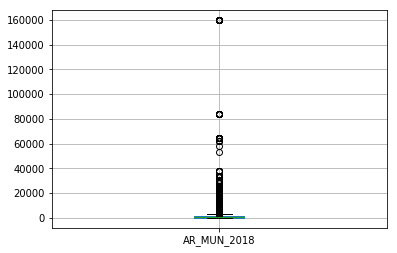

<Figure size 576x576 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt
# olist_ibge_v21.boxplot(column=['qtde_boleto', 'qtde_credit_card', 'qtde_debit_card'])
olist_ibge_v21.boxplot(column='AR_MUN_2018')
plt.figure(figsize=(8,8))
plt.show()

In [64]:
print(73067+19868)

92935


In [65]:
print(19868*100/92935)

21.378382740625167


In [66]:
print(73067*100/92935)

78.62161725937483


In [67]:
# Seleção de clientes com humor = 1
satisfeitos = olist_ibge_v21.loc[olist_ibge_v14["humor"] == 1]

In [68]:
# Seleção de clientes com humor = 0
insatisfeitos = olist_ibge_v21.loc[olist_ibge_v14["humor"] == 0]

In [69]:
insatisfeitos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19868 entries, 10 to 92934
Data columns (total 15 columns):
qtde_credit_card            19868 non-null int64
qtde_debit_card             19868 non-null int64
qtde_voucher                19868 non-null int64
soma_payment                19868 non-null float64
qtde_installments           19868 non-null int64
AR_MUN_2018                 19868 non-null float64
PIB                         19868 non-null float64
gini                        19868 non-null float64
dias                        19868 non-null float64
humor                       19868 non-null int64
le_product_id               19868 non-null int32
le_seller_id                19868 non-null int32
le_product_category_name    19868 non-null int32
le_sigla_state              19868 non-null int32
le_seller_sigla_state       19868 non-null int32
dtypes: float64(5), int32(5), int64(5)
memory usage: 2.0 MB


In [70]:
satisfeitos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73067 entries, 0 to 92931
Data columns (total 15 columns):
qtde_credit_card            73067 non-null int64
qtde_debit_card             73067 non-null int64
qtde_voucher                73067 non-null int64
soma_payment                73067 non-null float64
qtde_installments           73067 non-null int64
AR_MUN_2018                 73067 non-null float64
PIB                         73067 non-null float64
gini                        73067 non-null float64
dias                        73067 non-null float64
humor                       73067 non-null int64
le_product_id               73067 non-null int32
le_seller_id                73067 non-null int32
le_product_category_name    73067 non-null int32
le_sigla_state              73067 non-null int32
le_seller_sigla_state       73067 non-null int32
dtypes: float64(5), int32(5), int64(5)
memory usage: 7.5 MB


In [71]:
# seleção aleatória de 20% de satisfeitos.
satisfeitos_20 = satisfeitos.sample(14613)

In [72]:
satisfeitos_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14613 entries, 65087 to 29599
Data columns (total 15 columns):
qtde_credit_card            14613 non-null int64
qtde_debit_card             14613 non-null int64
qtde_voucher                14613 non-null int64
soma_payment                14613 non-null float64
qtde_installments           14613 non-null int64
AR_MUN_2018                 14613 non-null float64
PIB                         14613 non-null float64
gini                        14613 non-null float64
dias                        14613 non-null float64
humor                       14613 non-null int64
le_product_id               14613 non-null int32
le_seller_id                14613 non-null int32
le_product_category_name    14613 non-null int32
le_sigla_state              14613 non-null int32
le_seller_sigla_state       14613 non-null int32
dtypes: float64(5), int32(5), int64(5)
memory usage: 1.5 MB


In [73]:
# Põe os dois grupos juntos: os 30% satisfeitos e os insatisfeitos
# dados_emp=pd.concat([dados1,dados2])
olist_ibge_under_sampled = pd.concat([satisfeitos_20,insatisfeitos])

In [74]:
olist_ibge_under_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34481 entries, 65087 to 92934
Data columns (total 15 columns):
qtde_credit_card            34481 non-null int64
qtde_debit_card             34481 non-null int64
qtde_voucher                34481 non-null int64
soma_payment                34481 non-null float64
qtde_installments           34481 non-null int64
AR_MUN_2018                 34481 non-null float64
PIB                         34481 non-null float64
gini                        34481 non-null float64
dias                        34481 non-null float64
humor                       34481 non-null int64
le_product_id               34481 non-null int32
le_seller_id                34481 non-null int32
le_product_category_name    34481 non-null int32
le_sigla_state              34481 non-null int32
le_seller_sigla_state       34481 non-null int32
dtypes: float64(5), int32(5), int64(5)
memory usage: 3.6 MB


### Separar as explicativas da variável 'target' (variável alvo, a ser prevista).

In [75]:
explicativas = olist_ibge_under_sampled.drop(columns=['humor'])
target = olist_ibge_under_sampled['humor']

In [76]:
explicativas.head()

,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,PIB,gini,dias,le_product_id,le_seller_id,le_product_category_name,le_sigla_state,le_seller_sigla_state
65087,1,0,0,64.83,6,160.48,"97,891.89",0.85,19.84,23514,2701,71,15,21
27944,1,0,0,99.52,2,318.68,"53,974,918.69",0.77,15.97,20200,1488,13,25,21
15507,1,0,0,114.73,2,130.79,"19,528,538.26",0.79,21.92,19406,2873,54,22,21
70792,1,0,0,"2,207.98",10,"1,521.11","687,035,889.61",0.90,6.09,6530,346,33,25,21
48959,1,0,0,125.61,2,"2,054.73","12,974,926.16",0.83,10.05,25705,2322,54,17,21


In [77]:
explicativas.dtypes

qtde_credit_card              int64
qtde_debit_card               int64
qtde_voucher                  int64
soma_payment                float64
qtde_installments             int64
AR_MUN_2018                 float64
PIB                         float64
gini                        float64
dias                        float64
le_product_id                 int32
le_seller_id                  int32
le_product_category_name      int32
le_sigla_state                int32
le_seller_sigla_state         int32
dtype: object

In [78]:
target.head()

65087    1
27944    1
15507    1
70792    1
48959    1
Name: humor, dtype: int64

## Criação de dataframe com variaveis selecionadas

In [79]:
expl = explicativas[['soma_payment','le_product_id','le_seller_id', 'le_product_category_name', 'dias', 'AR_MUN_2018']]
# expl = explicativas[['soma_payment','le_product_id','le_seller_id', 'dias', 'AR_MUN_2018']]
# expl = explicativas[['soma_payment', 'le_seller_id', 'dias', 'AR_MUN_2018']]
expl.head()


,soma_payment,le_product_id,le_seller_id,le_product_category_name,dias,AR_MUN_2018
65087,64.83,23514,2701,71,19.84,160.48
27944,99.52,20200,1488,13,15.97,318.68
15507,114.73,19406,2873,54,21.92,130.79
70792,"2,207.98",6530,346,33,6.09,"1,521.11"
48959,125.61,25705,2322,54,10.05,"2,054.73"


In [80]:
expl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34481 entries, 65087 to 92934
Data columns (total 6 columns):
soma_payment                34481 non-null float64
le_product_id               34481 non-null int32
le_seller_id                34481 non-null int32
le_product_category_name    34481 non-null int32
dias                        34481 non-null float64
AR_MUN_2018                 34481 non-null float64
dtypes: float64(3), int32(3)
memory usage: 1.4 MB


# Separação em treino e teste

In [81]:
from sklearn.model_selection import train_test_split 
x_treino, x_teste, y_treino, y_teste = train_test_split(expl,
                                                       target,
                                                       test_size=0.3,
                                                       random_state=196)

In [82]:
x_treino.head()

,soma_payment,le_product_id,le_seller_id,le_product_category_name,dias,AR_MUN_2018
37562,171.84,5111,2630,8,36.66,509.32
69275,204.92,2719,1453,26,33.09,582.97
15361,214.59,9912,348,40,20.21,253.73
91782,445.65,17206,2427,23,10.05,210.22
56353,126.74,29976,274,44,11.18,"1,200.26"


In [83]:
x_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24136 entries, 37562 to 22129
Data columns (total 6 columns):
soma_payment                24136 non-null float64
le_product_id               24136 non-null int32
le_seller_id                24136 non-null int32
le_product_category_name    24136 non-null int32
dias                        24136 non-null float64
AR_MUN_2018                 24136 non-null float64
dtypes: float64(3), int32(3)
memory usage: 1.0 MB


# Tuninng de hiperparâmetros
Inicialmente, chamar o módulo de tuning.<br>
Passo a passo <br>
1 - definir um dict(dicionario com os valores dos hiperparams)<br>
2 - chamar o modulo de tunning<br>
3 - chamar obj do tunning<br>
4 - treinamento<br>
5 - avaliar os resultados

## Decision Tree

In [84]:
dt_dict = {
    'criterion' : ['gini','entropy'],
    'min_samples_leaf': [1,2,3,4,5,10],
    'random_state': [42]
       }

In [85]:
dt_dict

{'criterion': ['gini', 'entropy'],
 'min_samples_leaf': [1, 2, 3, 4, 5, 10],
 'random_state': [42]}

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [87]:
dt = DecisionTreeClassifier(random_state=42)

In [88]:
dt_grid = GridSearchCV(estimator=dt,       # parametro a ser utilizado. No caso, decision tree
                      param_grid=dt_dict,  # nome do dicionario com parametros
                      scoring='accuracy',  # parametro de validação: acurácia
                      cv=10)   

In [89]:
dt_grid.fit(x_treino, y_treino)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5, 10], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [90]:
dt_grid.best_params_

{'criterion': 'gini', 'min_samples_leaf': 10, 'random_state': 42}

In [91]:
dt_grid.best_score_

0.5842724560822009

##  Importação da biblioteca - cálculo de acurácia

In [92]:
from sklearn.metrics import accuracy_score

## Acurácia de treino - Decision Tree

In [93]:
dt_grid.best_score_

0.5842724560822009

In [94]:
acc_dt_treino = accuracy_score(y_treino, 
                              dt_grid.predict( # este é o objeto do grid, já com os melhores parametros
                                  x_treino))
acc_dt_treino

0.7773864766324163

##  Acurácia de teste - Decision Tree
A acurácia de teste está muito próxima à acurácia de treino, o que mostra que o modelo está perfomando bem.

In [95]:
acc_dt_teste = accuracy_score(y_teste, 
                              dt_grid.predict( # este é o objeto do grid, já com os melhores parametros
                                  x_teste))
acc_dt_teste

0.571967133881102

In [96]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(y_treino,dt_grid.predict(x_treino)))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81     13977
           1       0.76      0.70      0.73     10159

   micro avg       0.78      0.78      0.78     24136
   macro avg       0.77      0.77      0.77     24136
weighted avg       0.78      0.78      0.78     24136



In [98]:
print(classification_report(y_teste,dt_grid.predict(x_teste)))
print ("A acurácia da previsão é ", accuracy_score(y_teste,dt_grid.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      5891
           1       0.50      0.46      0.48      4454

   micro avg       0.57      0.57      0.57     10345
   macro avg       0.56      0.56      0.56     10345
weighted avg       0.57      0.57      0.57     10345

A acurácia da previsão é  0.571967133881102


## Logistic Regression

In [99]:
lr_dict= {
    "C":np.logspace(-3,3,7),
    "penalty":["l2"],
    'random_state': [1967]
}

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lr = LogisticRegression(random_state=1967)

In [102]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1967, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
lr_grid = GridSearchCV(estimator=lr,       # parametro a ser utilizado. No caso, logistic regression
                      param_grid=lr_dict,  # nome do dicionario com parametros
                      scoring='accuracy',  # parametro de validação: acurácia
                      cv=10)     

In [104]:
lr_grid.fit(x_treino, y_treino)

D:\anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

D:\anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1967, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l2'], 'random_state': [1967]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [105]:
lr_grid.best_params_

{'C': 1.0, 'penalty': 'l2', 'random_state': 1967}

In [106]:
lr_grid.best_score_

0.6061899237653298

In [107]:
lr_grid.estimator

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1967, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

##  Importação da biblioteca - cálculo de acurácia

In [108]:
from sklearn.metrics import accuracy_score

## Acurácia de treino - Logistic Regression

In [109]:
lr_grid.best_score_

0.6061899237653298

In [110]:
acc_lr_treino = accuracy_score(y_treino, 
                              lr_grid.predict( # este é o objeto do grid, já com os melhores parametros
                                  x_treino))
acc_lr_treino

0.6058584686774942

##  Acurácia de teste - Logistic Regression
A acurácia de teste está muito próxima à acurácia de treino, o que mostra que o modelo está perfomando bem.

In [111]:
acc_lr_teste = accuracy_score(y_teste, 
                              lr_grid.predict( # este é o objeto do grid, já com os melhores parametros
                                  x_teste))
acc_lr_teste

0.5950700821652972

In [112]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(y_treino,lr_grid.predict(x_treino)))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69     13977
           1       0.54      0.40      0.46     10159

   micro avg       0.61      0.61      0.61     24136
   macro avg       0.59      0.58      0.57     24136
weighted avg       0.60      0.61      0.59     24136



In [114]:
print(classification_report(y_teste,lr_grid.predict(x_teste)))
print ("A acurácia da previsão é ", accuracy_score(y_teste,lr_grid.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68      5891
           1       0.54      0.39      0.45      4454

   micro avg       0.60      0.60      0.60     10345
   macro avg       0.58      0.57      0.57     10345
weighted avg       0.59      0.60      0.58     10345

A acurácia da previsão é  0.5950700821652972


In [116]:
#matriz de confusão
from sklearn import metrics
cnf_matrix =  metrics.confusion_matrix(y_teste, lr_grid.predict(x_teste))

In [117]:
#matriz de confusão
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


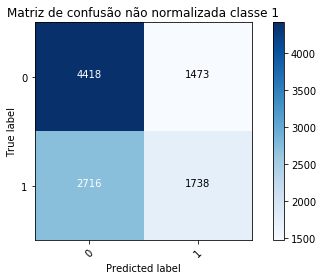

In [121]:
#visualizando a matriz de confusão
plot_confusion_matrix(cnf_matrix,classes =['0', '1'],
                      title='Matriz de confusão não normalizada classe 1', normalize=False)

In [119]:
tn = 4418
tp = 1738
fn = 2716
fp = 1473
recall = tp/(tp+fn)
precisão = tp/(tp+fp)

In [120]:
print (recall)
print (precisão)

0.3902110462505613
0.5412644036125818


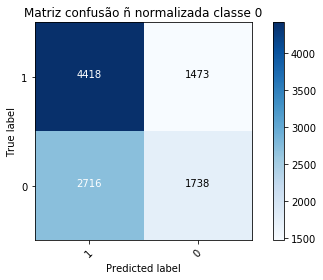

In [125]:
#visualizando a matriz de confusão
plot_confusion_matrix(cnf_matrix,classes =['1', '0'],
                      title='Matriz confusão ñ normalizada classe 0', normalize=False)

In [128]:
tn = 1738
tp = 4418
fn = 1473
fp = 2716
recall = tp/(tp+fn)
precisão = tp/(tp+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)

In [129]:
print (recall)
print (precisão)
print (accuracy)

0.7499575623832966
0.6192879170171012
0.5950700821652972
